# **Project 2**: Position prediction for football players

## Data Preprocessing and Quality Assurance

In [107]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [108]:
# Importing data
df = pd.read_csv('train.csv')

# Display the first few rows of the DataFrame with all columns
pd.set_option('display.max_columns', None)
df.head()


,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,Mexican Liga MX,1,29,NaN,2021-07-12,2026,Mexico,NaN,Right,5,3,1,Medium/High,Normal (170-185),No,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB
1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,Scottish Premiership,1,4,NaN,2021-07-23,2022,Austria,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM
2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,Danish Superliga,1,19,NaN,2021-07-24,2026,Sweden,NaN,Left,3,3,1,High/Medium,Normal (170-185),No,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB
3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,Korean K League 1,1,9,NaN,2018-02-08,2023,Montenegro,NaN,Right,3,3,1,High/Medium,Lean (185+),No,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,NaN,LS
4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,Romanian Liga I,1,30,NaN,2019-07-01,2022,Romania,NaN,Left,2,2,1,Medium/High,Normal (170-185),No,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,NaN,LB


In [109]:
#Statistical summary of all columns
df.describe(include='all')

,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
count,6895.000000,6895,6895.000000,6895.000000,6.893000e+03,6895.000000,6895,6895.000000,6895.000000,6895,6895,6895.000000,6895.000000,351,6544,6895.000000,6895,413.000000,6895,6895.000000,6895.000000,6895.000000,6895,6895,6895,6.542000e+03,771,4306,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,631.000000,6895
unique,NaN,6692,NaN,NaN,NaN,NaN,3991,NaN,NaN,701,55,NaN,NaN,196,1263,NaN,144,NaN,2,NaN,NaN,NaN,9,10,2,NaN,61,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,J. Rodríguez,NaN,NaN,NaN,NaN,1992-02-29,NaN,NaN,Strømsgodset IF,USA Major League Soccer,NaN,NaN,Racing Club,2021-07-01,NaN,England,NaN,Right,NaN,NaN,NaN,Medium/Medium,Normal (170-185),No,NaN,#Strength,Speed Dribbler (AI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCB
freq,NaN,7,NaN,NaN,NaN,NaN,65,NaN,NaN,11,271,NaN,NaN,7,449,NaN,596,NaN,5209,NaN,NaN,NaN,3125,2471,5849,NaN,245,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631
mean,223463.552719,NaN,68.825671,72.031327,4.320388e+06,12034.126178,NaN,181.478898,75.527919,NaN,NaN,1.361856,16.442350,NaN,NaN,2022.754605,NaN,12.215496,NaN,3.001885,2.453227,1.149239,NaN,NaN,NaN,8.148991e+06,NaN,NaN,68.535121,54.300128,60.068487,64.570243,55.549968,68.293582,52.890355,48.229587,55.045395,62.326468,44.765772,58.370993,50.416534,45.266860,56.790283,61.769108,65.890210,65.969253,65.319507,65.006381,64.847571,60.509645,67.255547,67.893111,68.161711,49.844815,59.761421,51.482524,53.129369,56.910950,49.883249,61.875997,51.281653,52.249021,49.736766,15.897317,15.690210,15.558666,15.819144,16.003046,40.220285,NaN
std,26876.952793,NaN,5.950459,6.070890,1.052554e+07,24630.820430,NaN,6.862683,7.041120,NaN,NaN,0.760018,15.440185,NaN,NaN,1.204310,NaN,6.870830,NaN,0.688816,0.779289,0.475607,NaN,NaN,NaN,2.056057e+07,NaN,NaN,11.777003,14.386234,9.603023,9.380977,15.616228,8.548078,17.821338,19.590512,16.912842,13.304233,17.889228,17.916720,18.353157,17.836771,14.158848,15.404000,14.574856,14.471922,14.486737,7.930340,14.234916,13.104803,12.197936,15.097768,11.833659,19.299767,16.248418,20.062325,19.313623,13.591278,15.663569,10.937084,19.654312,20.8987

### Intuition behind some features:
    - height_cm: cb and more defensive players may tend to be taller than cm.
    - weight_kg: some player position may benefit from increased muscular mass, thus more weight, like defensive players (cb).
    - club_jersey_number: certain jersey number like number 9 can be associated with a position, like striker in this example.
    - nation_jersey_number (same case as above).
    - preferred_foot: certain attacking position may have a more preferred left foot players.
    - weak_foot: strikers and wingers tend to have better weak_foot striking.
    - skill moves: skill moves are usually higher in wingers.
    - work rate: cm tend to have higher work rates in both defense and attack, while strikers in attack and defense in defense.
    - body_type: certain positions may benefit from certain body type.
    - player_tags: certain player tags can be asociated with certain position, for example dribbler and CM.
    - player_traits: same logic as player_tags.
    - Shooting, passing, defending, etc... certain players of course have different distribution of these features.
    - goalkeeping_speed: if any player has a value !=0 in this feature, it means the player is a goalkeeper

### Dropping variables that are not consider influential in the prediction

In [110]:
variable_dropping_list = [
    'id', 'short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
    'birthday_date', 'club_name', 'league_level', 'club_loaned_from',
    'club_joined', 'club_contract_valid_until', 'nationality_name', 'international_reputation',
    'real_face', 'release_clause_eur', 'goalkeeping_diving', 'goalkeeping_handling',
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
]

df = df.drop(columns=variable_dropping_list)

### Addressing missing values

In [111]:
missing_values_count = df.isnull().sum()
print(missing_values_count)


height_cm                         0
weight_kg                         0
league_name                       0
club_jersey_number                0
nation_jersey_number           6482
preferred_foot                    0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
player_tags                    6124
player_traits                  2589
pace                            631
shooting                        631
passing                         631
dribbling                       631
defending                       631
physic                          631
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control          

### Nation Jersey Number Missing treatment

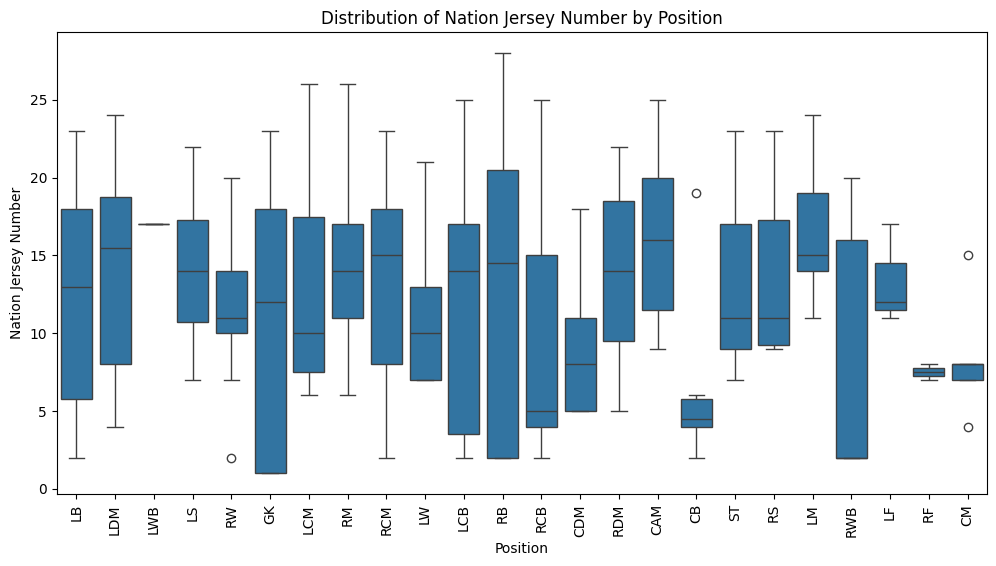

In [112]:
# Nation Jersey Number

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a box plot to show the distribution of nation_jersey_number by position
sns.boxplot(data=df, x='position', y='nation_jersey_number')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Distribution of Nation Jersey Number by Position')
plt.xlabel('Position')
plt.ylabel('Nation Jersey Number')

# Display the plot
plt.show()


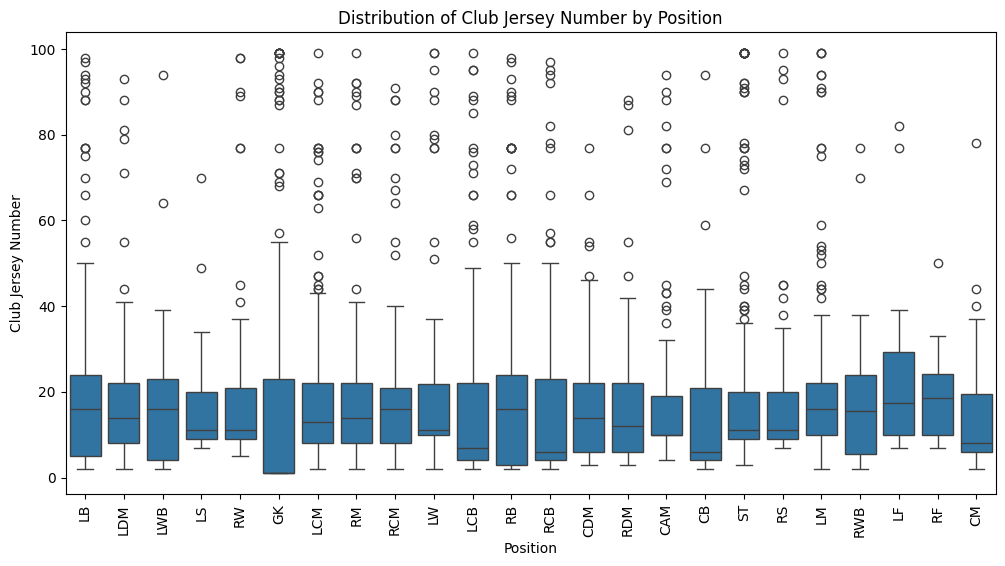

In [113]:
# Club Jersey Number

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a box plot to show the distribution of club_jersey_number by position
sns.boxplot(data=df, x='position', y='club_jersey_number')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Distribution of Club Jersey Number by Position')
plt.xlabel('Position')
plt.ylabel('Club Jersey Number')

# Display the plot
plt.show()


In [114]:
# Count the number of club_jersey_number values above 40, grouped by position
club_jersey_above_40 = df[df['club_jersey_number'] > 40].groupby('position')['club_jersey_number'].count()

# Display the result
print(club_jersey_above_40)
print(sum(club_jersey_above_40))


position
CAM    11
CB      6
CDM     8
CM      2
GK     36
LB     20
LCB    28
LCM    25
LDM     8
LF      2
LM     20
LS      2
LW     11
LWB     2
RB     24
RCB    24
RCM    11
RDM     6
RF      1
RM     15
RS      7
RW      8
RWB     2
ST     28
Name: club_jersey_number, dtype: int64
307


In [115]:
# Nation Jersey missing drop, as we get similar information from club_jersey_number
# and also too many missing values

df = df.drop(columns=['nation_jersey_number'])

### Player tags missing treatment

In [116]:
# Filling missing values with None tag for the player

df['player_tags'].fillna("None", inplace=True)


### Player traits missing treatment

In [117]:
# Filling missing values with None trait for the player

df['player_traits'].fillna("None", inplace=True)

### pace, shooting, passing, dribbling, defending, physic. Missing values treatment

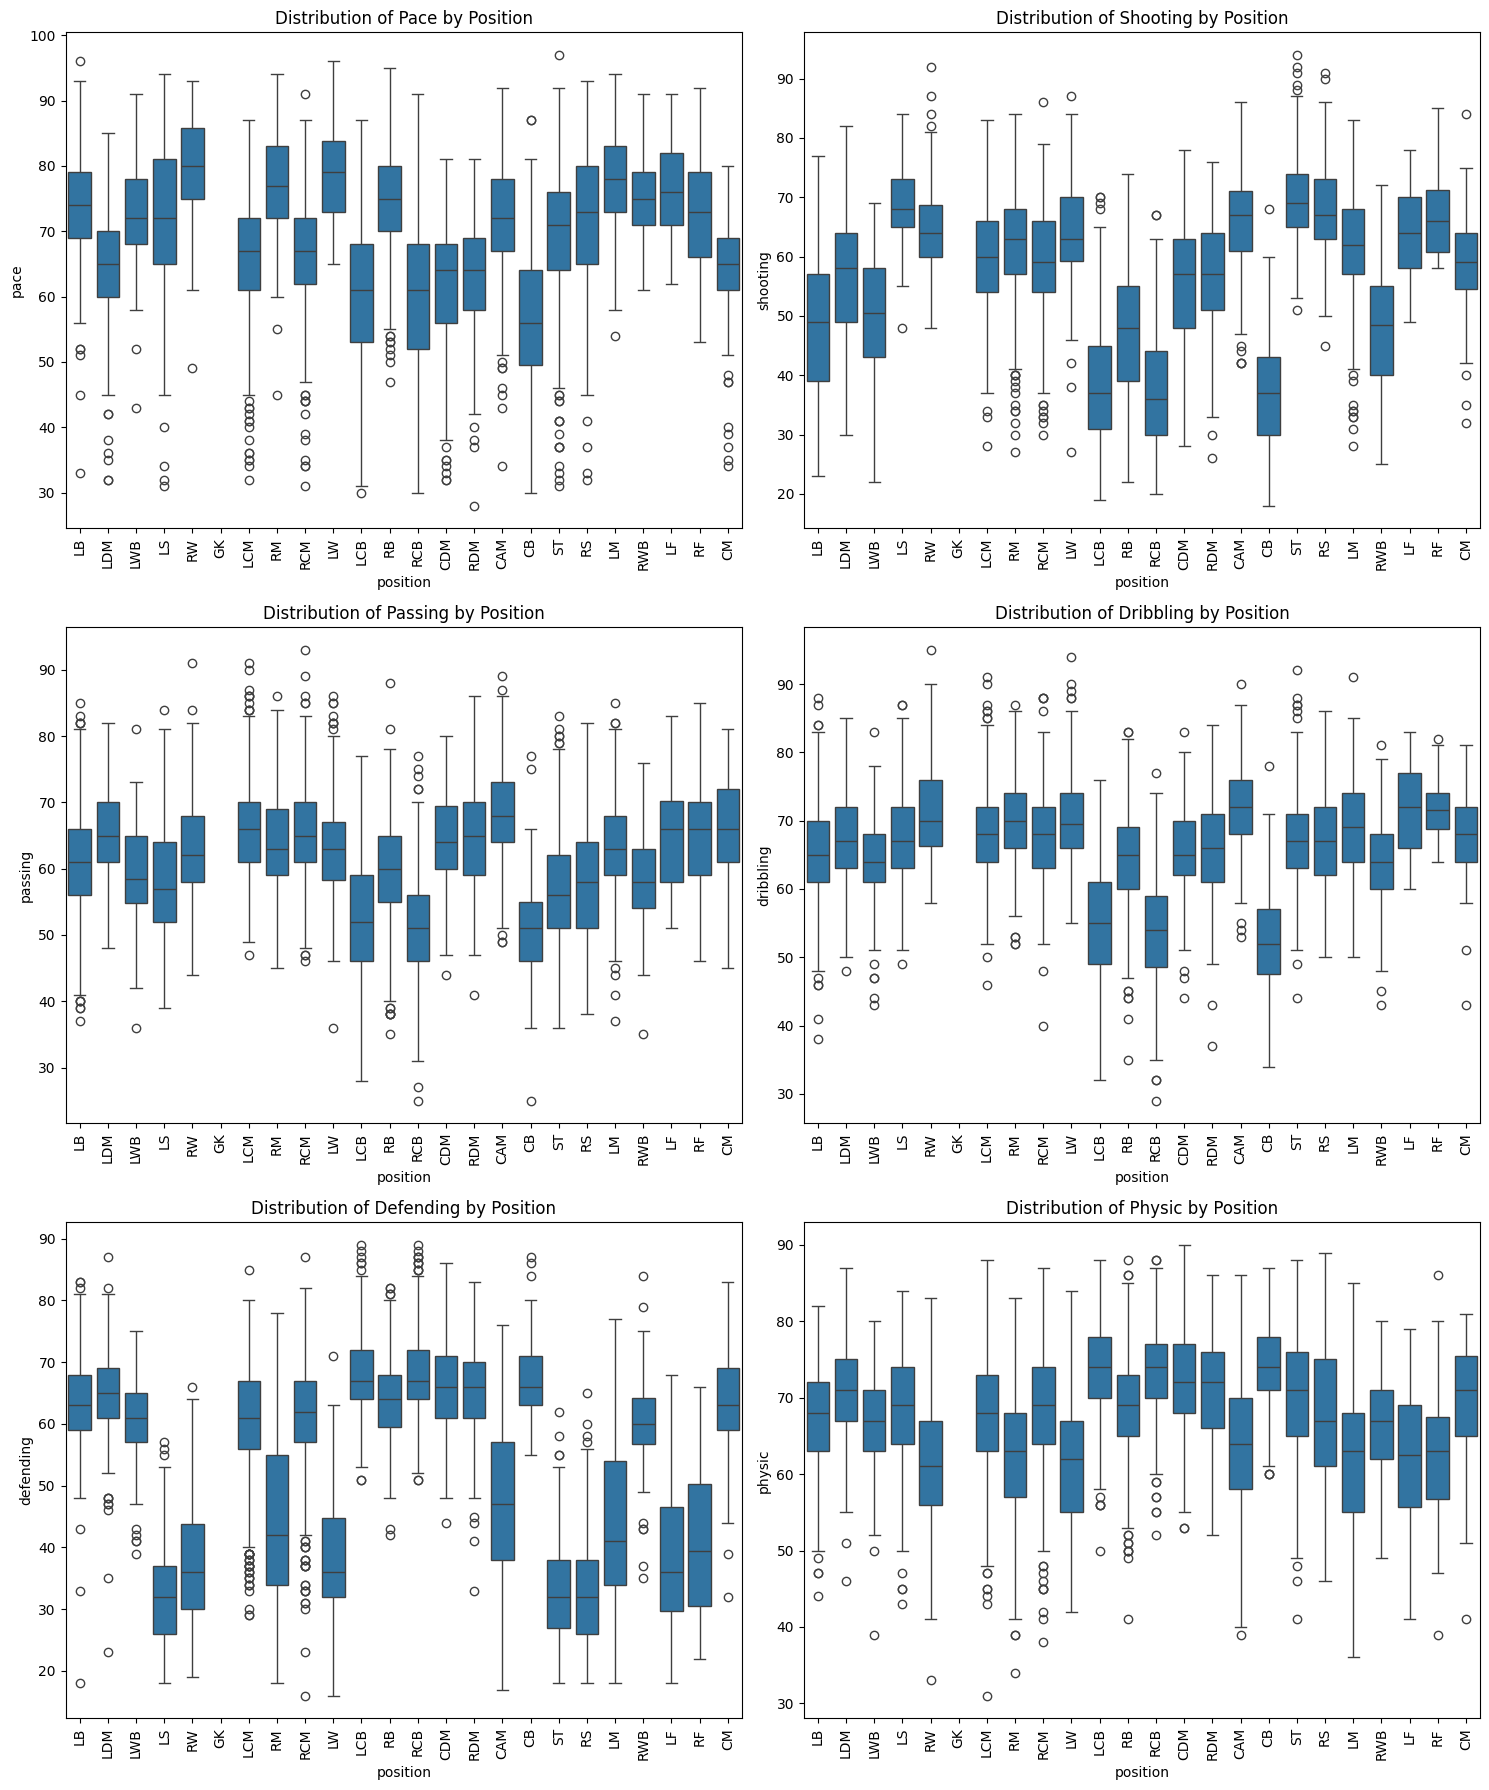

In [118]:
# List of attributes to plot
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Set up the figure for multiple subplots
plt.figure(figsize=(15, 18))
for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='position', y=attribute)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {attribute.capitalize()} by Position')

plt.tight_layout()
plt.show()

### goalkeeping_speed missing values

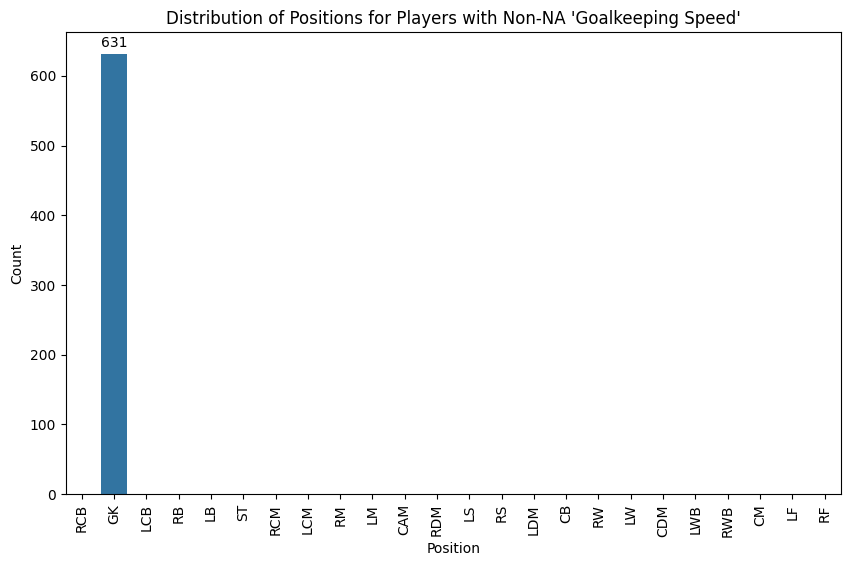

In [120]:
# In this variable, if the player has any value different than NA it means that
# the player position is a GK, we can quickly verify this with:

# Plot the distribution of positions for players with non-NA 'goalkeeping_speed' values
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df[df['goalkeeping_speed'].notna()], x='position', order=df['position'].value_counts().index)

# Add counts above each bar if height is not NaN
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):  # Only add annotation if height is a valid number
        plot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title("Distribution of Positions for Players with Non-NA 'Goalkeeping Speed'")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [121]:
# Count the total number of players with position 'GK'
total_gk_count = df[df['position'] == 'GK'].shape[0]
print("Total number of goalkeepers (GK) in the train data:", total_gk_count)

Total number of goalkeepers (GK) in the train data: 631


In [122]:
# So in order to imput missing values, we will modify the variable to =1 if
# goalkeeping_speed >0
df['goalkeeping_speed'] = df['goalkeeping_speed'].apply(lambda x: 1 if x > 0 else 0)

In [123]:
# Remaining missing values check
missing_values_count = df.isnull().sum()
print(missing_values_count)

height_cm                      0
weight_kg                      0
league_name                    0
club_jersey_number             0
preferred_foot                 0
weak_foot                      0
skill_moves                    0
work_rate                      0
body_type                      0
player_tags                    0
player_traits                  0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_r

## Feature engineering